In [212]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
%matplotlib inline

In [213]:
data = pd.read_csv("/home/nlp/Downloads/Dataset/Shakes/shakespeare-plays/Shakespeare_data.csv").dropna()

In [214]:
#This is a dataset comprised of all of Shakespeare's plays. It includes the following:

    #The first column is the Data-Line, it just keeps track of all the rows there are
    #The second column is the play that the lines are from.
    #The third column is the actual line being spoken at any given time.
    #The fourth column is the Act-Scene-Line from which any given line is from.
    #The fifth column is the player who is saying any given line.
    #The sixth column is the line being spoken.


In [215]:
data.head(5)

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"
5,6,Henry IV,1.0,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils
6,7,Henry IV,1.0,1.1.4,KING HENRY IV,To be commenced in strands afar remote.
7,8,Henry IV,1.0,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil


In [216]:
data.isnull().sum()

Dataline            0
Play                0
PlayerLinenumber    0
ActSceneLine        0
Player              0
PlayerLine          0
dtype: int64

In [217]:
Play_Count =data['Play'].value_counts()
Play_Count

Hamlet                      4020
Coriolanus                  3768
Cymbeline                   3756
Richard III                 3705
Antony and Cleopatra        3565
Othello                     3563
King Lear                   3500
Troilus and Cressida        3491
A Winters Tale              3364
Henry VIII                  3279
Henry V                     3233
Henry VI Part 2             3130
Romeo and Juliet            3096
Henry IV                    3044
Henry VI Part 3             2939
Alls well that ends well    2925
Loves Labours Lost          2878
Measure for measure         2840
Richard II                  2800
Henry VI Part 1             2777
As you like it              2677
Merchant of Venice          2665
King John                   2649
Taming of the Shrew         2637
Merry Wives of Windsor      2614
Julius Caesar               2597
Much Ado about nothing      2584
Titus Andronicus            2559
Timon of Athens             2500
Twelfth Night               2483
Pericles  

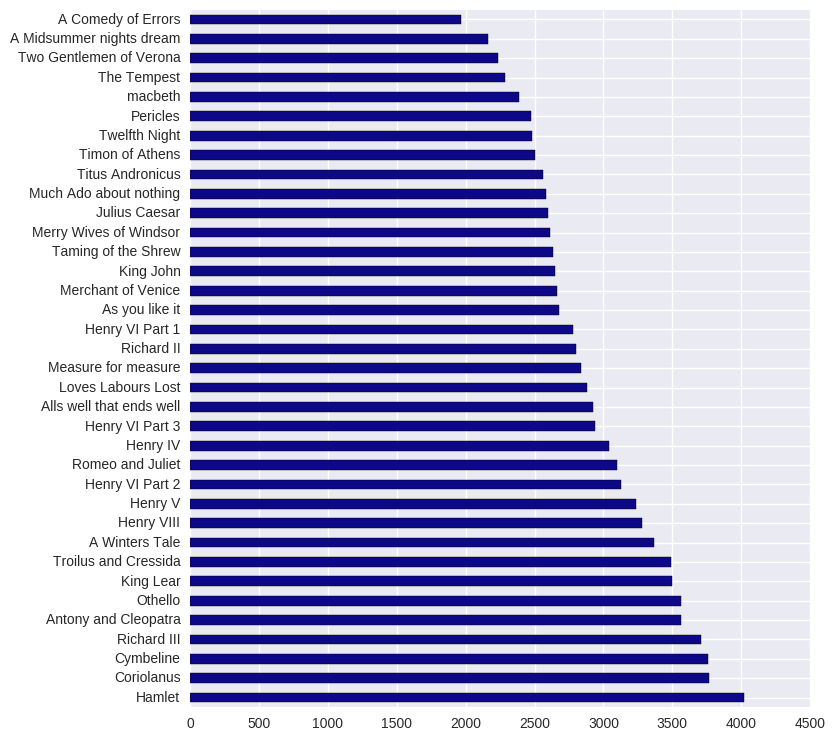

In [218]:
Play_Count.plot(kind='barh',figsize=(8,9),colormap='plasma')

In [219]:
Player_Count =data['Player'].value_counts()[:30]
Player_Count[:30]

GLOUCESTER          1811
HAMLET              1503
IAGO                1101
FALSTAFF            1053
KING HENRY V        1029
BRUTUS               976
OTHELLO              888
KING HENRY VI        871
DUKE VINCENTIO       858
MARK ANTONY          849
TIMON                824
QUEEN MARGARET       814
Clown                761
KING RICHARD II      758
KING LEAR            753
TITUS ANDRONICUS     725
MACBETH              718
HELENA               702
PROSPERO             699
YORK                 694
LEONTES              693
CLEOPATRA            689
PORTIA               681
CORIOLANUS           681
ROSALIND             677
WARWICK              648
BUCKINGHAM           633
BIRON                624
ROMEO                613
PERICLES             611
Name: Player, dtype: int64

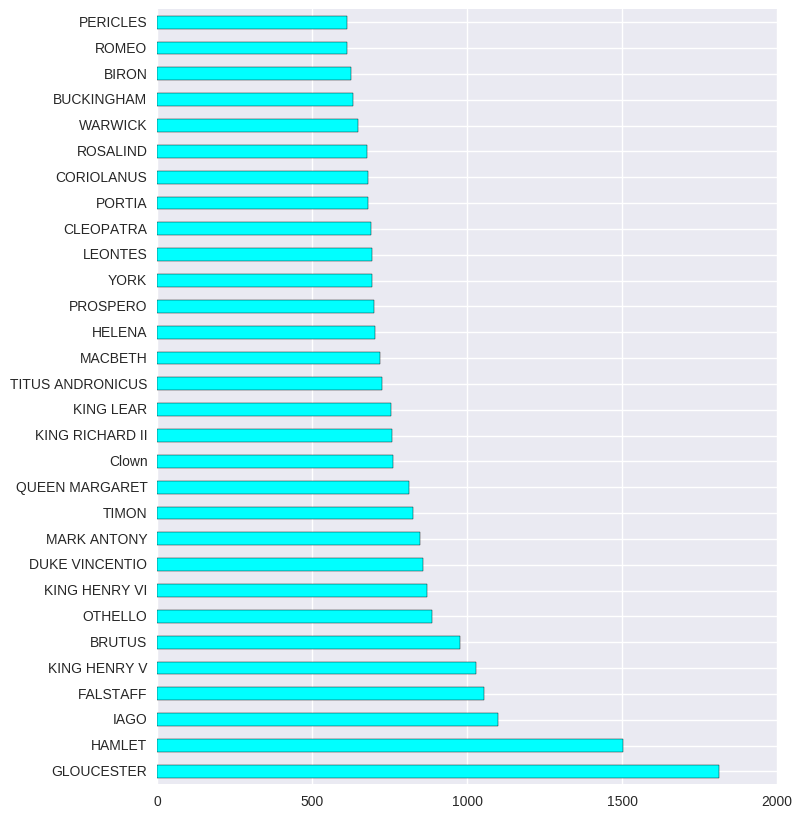

In [220]:
Player_Count.plot(kind='barh',figsize=(8,10),colormap='cool')

In [221]:
Play_Line_Count = data.groupby(['Play','Player']).count()['PlayerLinenumber']
Play_Line_Count

Play                      Player            
A Comedy of Errors        ADRIANA               276
                          AEGEON                147
                          AEMELIA                73
                          ANGELO                 96
                          ANTIPHOLUS              6
                          BALTHAZAR              31
                          Courtezan              40
                          DROMIO OF EPHESUS     187
                          DROMIO OF SYRACUSE    314
                          DUKE SOLINUS           93
                          First Merchant         18
                          Gaoler                  1
                          LUCE                   11
                          LUCIANA               108
                          OF EPHESUS            210
                          OF SYRACUSE           271
                          Officer                16
                          PINCH                  16
                   

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

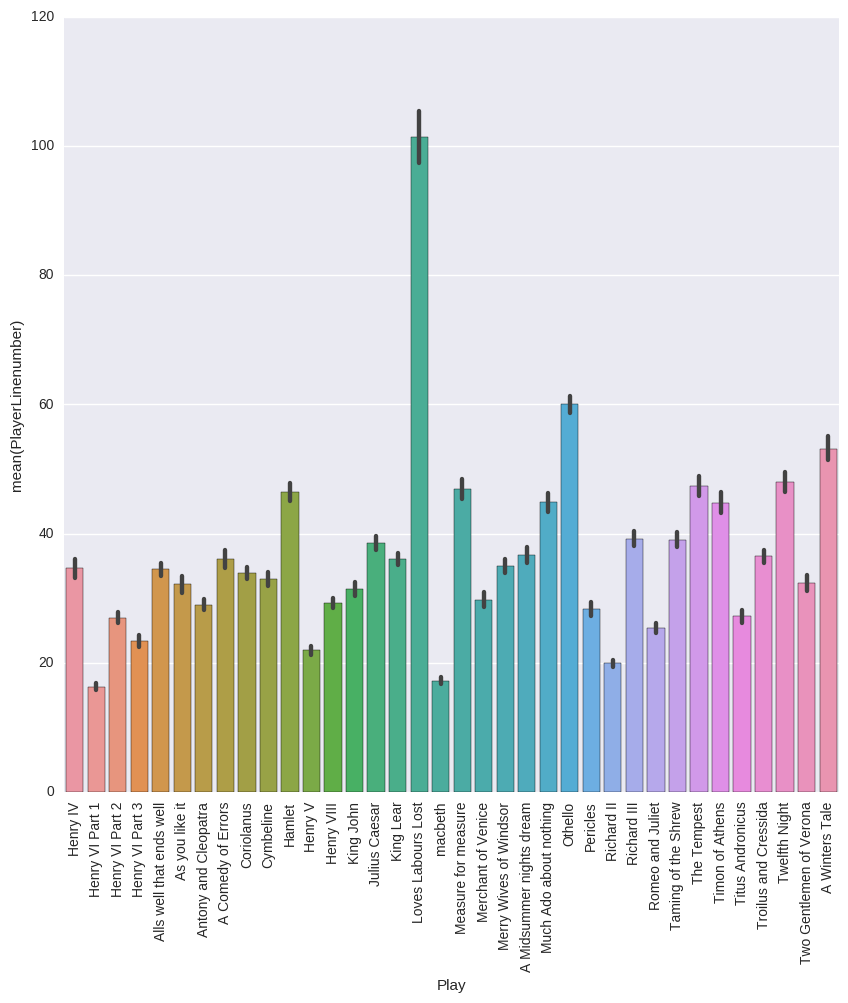

In [222]:
#Play_Line_Count.plot(figsize=(10,10))
plt.rcParams['figure.figsize']=(10,10)
ax= sns.barplot(x='Play',y='PlayerLinenumber',data=data)
plt.setp(ax.get_xticklabels(), rotation=90)

Name: 
Type: Graph
Number of nodes: 970
Number of edges: 1302
Average degree:   2.6845


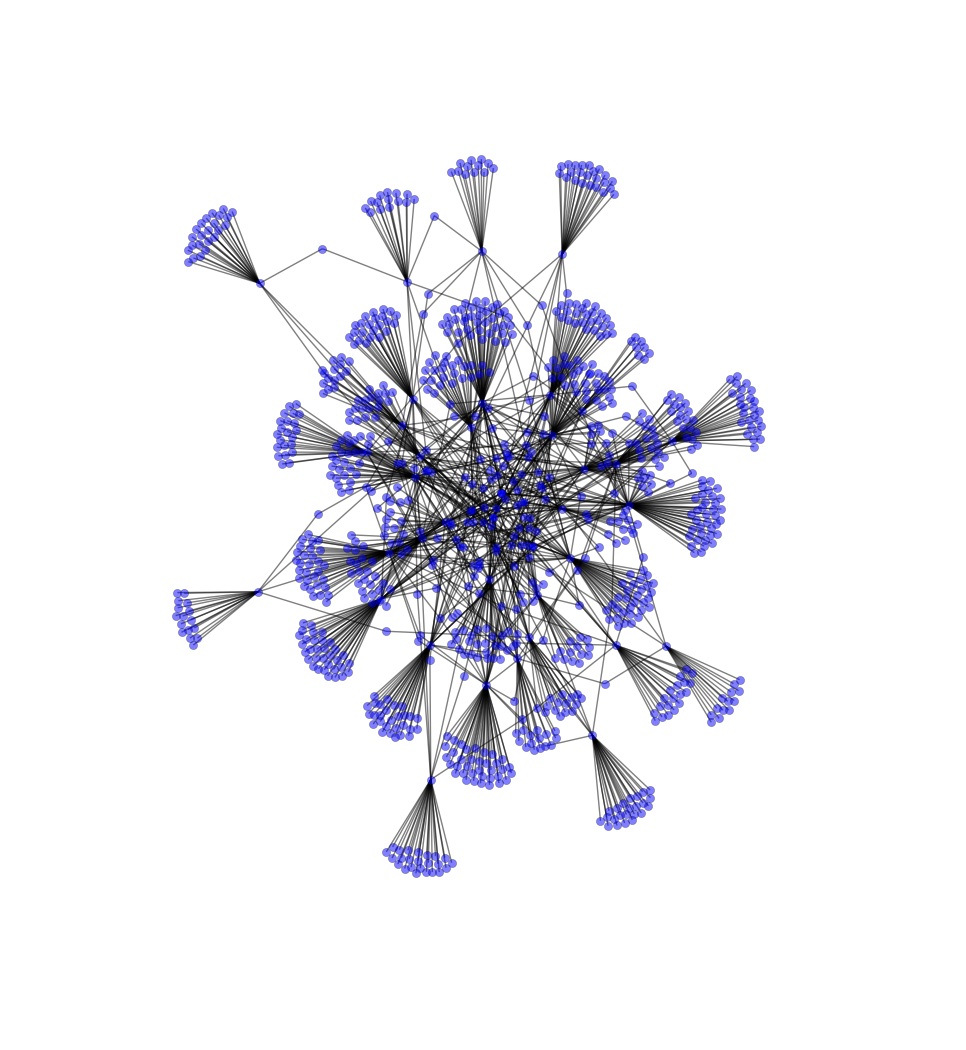

In [223]:
Graphx= nx.Graph()
Graphx = nx.from_pandas_dataframe(data,source='Play',target='Player')
print (nx.info(g))


plt.figure(figsize=(9,10)) 
nx.draw(g,alpha=0.5, node_color="blue",with_labels=False,node_size=35)
plt.show()



In [224]:
#Setiment Analysis 

In [225]:
len(data)

105152

In [226]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import*
senti = SentimentIntensityAnalyzer()

In [227]:
%%time

data['Senti_Compound_Score'] = data.PlayerLine.apply(lambda x : senti.polarity_scores(x)['compound'])
data['Neutral_score'] = data.PlayerLine.apply(lambda x : senti.polarity_scores(x)['neu'])
data['Positive_score'] = data.PlayerLine.apply(lambda x : senti.polarity_scores(x)['pos'])
data['Negative_score'] = data.PlayerLine.apply(lambda x : senti.polarity_scores(x)['neg'])

data.loc[data.Senti_Compound_Score >0 ,'Overall_Sentiment']='Positive'
data.loc[data.Senti_Compound_Score == 0, 'Overall_Sentiment'] = 'Neutral'
data.loc[data.Senti_Compound_Score < 0,'Overall_Sentiment'] = 'Negative'

CPU times: user 55.1 s, sys: 388 ms, total: 55.5 s
Wall time: 55.4 s


In [228]:
data.head(2)

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine,Senti_Compound_Score,Neutral_score,Positive_score,Negative_score,Overall_Sentiment
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,",0.4349,0.581,0.287,0.132,Positive
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,",0.2732,0.504,0.294,0.202,Positive


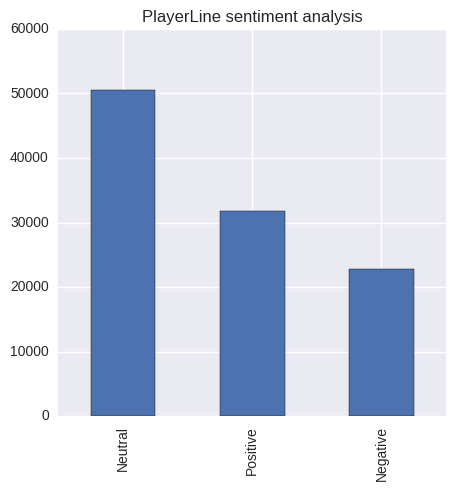

In [229]:
plt.figure(figsize=(5,5)) 
data.Overall_Sentiment.value_counts().plot(kind='bar',title="PlayerLine sentiment analysis")

In [230]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.sklearn
import sys
import os

In [231]:
def display_topics(model, feature_names, no_top_words):
    
    for topic_idx, topic in enumerate(model.components_):
        print("Topic:", (topic_idx))
        print(" ".join([feature_names[i]
        for i in topic.argsort()[:-no_top_words - 1:-1]]))


def tfidf_vectorizer(documents,total_features):

    #  TFIDF Vectorizer
    tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=total_features, stop_words='english')
    tfidf = tfidf_vectorizer.fit_transform(documents)
    tfidf_feature_names = tfidf_vectorizer.get_feature_names()
    return tfidf_vectorizer,tfidf,tfidf_feature_names

def count_vectorizer(documents,total_features):

    #  Count Vectorizer
    tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=total_features, stop_words='english')
    tf = tf_vectorizer.fit_transform(documents)
    tf_feature_names = tf_vectorizer.get_feature_names()
    return tf_vectorizer,tf,tf_feature_names

In [232]:
total_features = 1000

tfidf_vectorizer, tfidf, tfidf_feature_names = tfidf_vectorizer(data['PlayerLine'],total_features)
tf_vectorizer, tf, tf_feature_names = count_vectorizer(data['PlayerLine'],total_features)

In [233]:
#num_topic = 2
#model_nmf = NMF(n_components=num_topic, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

In [ ]:
%%time 


model_lda = LatentDirichletAllocation(n_topics=num_topic, max_iter=30, learning_method='online', learning_offset=50.,random_state=0).fit(tfidf)

no_top_words = 10
display_topics(model_nmf, tfidf_feature_names, no_top_words)
display_topics(model_lda, tfidf_feature_names, no_top_words)


('Topic:', 0)
thou art hast st dost wilt shalt know say man
('Topic:', 1)
shall know make say hear come live time think speak
('Topic:', 2)
lord good ay know noble gracious say tis king did
('Topic:', 3)
sir good know come ay pray john say man marry
('Topic:', 4)
thy thee come let ll love make good hath like
('Topic:', 0)
did good tis tell father heart lady honour fear leave
('Topic:', 1)
love thy say night hand doth away pray fair nay
('Topic:', 2)
sir come hath man day look great death ay world
('Topic:', 3)
lord like make king time men true god sweet heaven
('Topic:', 4)
thou thee shall let know speak think ll thy life
CPU times: user 4min 36s, sys: 500 ms, total: 4min 36s
Wall time: 4min 36s


In [ ]:
%%time 

data = pyLDAvis.sklearn.prepare(model_lda,tfidf,tfidf_vectorizer)
pyLDAvis.show(data)


Note: if you're in the IPython notebook, pyLDAvis.show() is not the best command
      to use. Consider using pyLDAvis.display(), or pyLDAvis.enable_notebook().
      See more information at http://pyLDAvis.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8889/    [Ctrl-C to exit]


127.0.0.1 - - [27/Apr/2017 15:04:33] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [27/Apr/2017 15:04:33] "GET /LDAvis.css HTTP/1.1" 200 -
127.0.0.1 - - [27/Apr/2017 15:04:33] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [27/Apr/2017 15:04:33] "GET /LDAvis.js HTTP/1.1" 200 -
